¡Hola, Fernando!

Mi nombre es Tonatiuh Cruz. Me complace revisar tu proyecto hoy.

Al identificar cualquier error inicialmente, simplemente los destacaré. Te animo a localizar y abordar los problemas de forma independiente como parte de tu preparación para un rol como data-analyst. En un entorno profesional, tu líder de equipo seguiría un enfoque similar. Si encuentras la tarea desafiante, proporcionaré una pista más específica en la próxima iteración.

Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o elimines**.

Puedes encontrar mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Éxito. Todo está hecho correctamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Observaciones. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Necesita corrección. El bloque requiere algunas correcciones. El trabajo no puede ser aceptado con comentarios en rojo.
</div>

Puedes responderme utilizando esto: 

<div class="alert alert-block alert-info">
<b>Comentario del alumno</b> <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Resumen de la revisión 1</b> <a class="tocSkip"></a>

Hola Fernando! Has hecho un excelente trabajo, cada vez más cercas de convertirte en un analista de datos. Realizaste la carga de bases, su análisis inicial, sus ajustes, un análisis de algunos variables conmplementado con gráficas y el desarrollo de las pruebas de hipótesis. Solamente te dejo algunos comentarios para complementar el análisis. 

Sigue con el excelente trabajo!
</div>

In [2]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('/datasets/games.csv')

# Mostrar las primeras filas para ver estructura
print(df.head())

# Información general del dataset
print(df.info())

# Estadísticas básicas para columnas numéricas
print(df.describe(include='all'))


                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Has realizado un excelente trabajo al importar los datos y las bibliotecas necesarias.

</div>

In [3]:
# Convertir nombres de columnas a minúsculas
df.columns = [col.lower() for col in df.columns]

# Tipos de datos actuales:
print(df.dtypes)

# Convertir 'year_of_release' a entero (si es posible)
df['year_of_release'] = pd.to_numeric(df['year_of_release'], errors='coerce').astype('Int64')

# Convertir 'user_score' que está en escala 0-10, pero puede ser texto 'tbd' a numérico
# Reemplazar 'tbd' por NaN y luego convertir
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

# Explicación:
# 'year_of_release': se convierte a entero porque es un año, un dato discreto.
# 'user_score': tiene valores 'tbd' (to be determined), que no son numéricos, los convertimos a NaN para manejarlos.

# Tratamiento de valores ausentes

# Mostrar resumen de valores nulos por columna
print(df.isna().sum())

# Manejo de 'tbd' en user_score: dejamos NaN porque no hay valor confiable, y los analyses estadísticos ignorarán estos registros o podemos imputar más adelante.
# En otras columnas con pocos NaN, podríamos rellenar o eliminar, según contexto.

# Calcular ventas totales y añadir columna
df['total_sales'] = df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

print(df[['name', 'total_sales']].head())


name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object
name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64
                       name  total_sales
0                Wii Sports        82.54
1         Super Mario Bros.        40.24
2            Mario Kart Wii        35.52
3         Wii Sports Resort        32.77
4  Pokemon Red/Pokemon Blue        31.38


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Hola! Muy buen trabajo en la sección, ajustaste los nombres de las columnas a minúsculas con el uso de la función str.lower(), cambiaste el tipo de variable de la base de datos y muy buen trabajo con la suma de todas las ventas. 



In [ ]:
En las columnas user_score y critic_score encontré valores ausentes y también valores “tbd” (to be determined). Decidí reemplazar esos “tbd” por valores nulos (NaN) para poder manejar la columna numéricamente, y dejé esos valores nulos sin rellenar.

No rellené esos valores porque no tengo información confiable para imputarlos. Además, rellenar con la media o mediana podría sesgar el análisis, ya que las puntuaciones son datos importantes para entender la relación entre calidad y ventas.

Por eso, en los análisis que requieren estas columnas, simplemente excluyo las filas con valores faltantes para asegurar resultados más confiables.

Creo que los valores están ausentes porque algunos juegos no habían sido evaluados aún por usuarios o críticos en el momento en que se recogieron los datos, o porque son juegos muy nuevos o poco conocidos que no tienen suficientes reseñas. También puede deberse a que los datos originales no estaban actualizados o tenían errores.

Por eso, prefiero dejar estos valores en blanco para no afectar la calidad del análisis.

Presta atención a la abreviatura TBD: significa "to be determined" (a determinar). Especifica cómo piensas manejar estos casos.

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      62
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: year_of_release, dtype: Int64


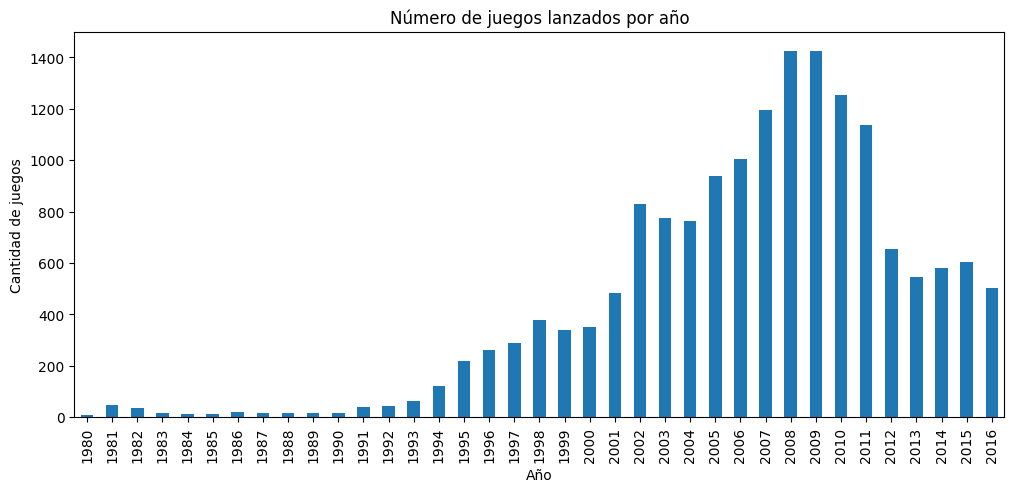

In [4]:
import matplotlib.pyplot as plt

games_per_year = df['year_of_release'].value_counts().sort_index()
print(games_per_year)

# Gráfico
games_per_year.plot(kind='bar', figsize=(12,5), title='Número de juegos lanzados por año', xlabel='Año', ylabel='Cantidad de juegos')
plt.show()


<div class="alert alert-block alert-success">
<b>Comentario del revisor:</b> <a class="tocSkip"></a>
    
Gran trabajo, esta gráfica nos ayuda a entender el comportamiento del mercado de videojuegos en el tiempo



platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64
Top plataformas: ['PS2', 'X360', 'PS3', 'Wii', 'DS']


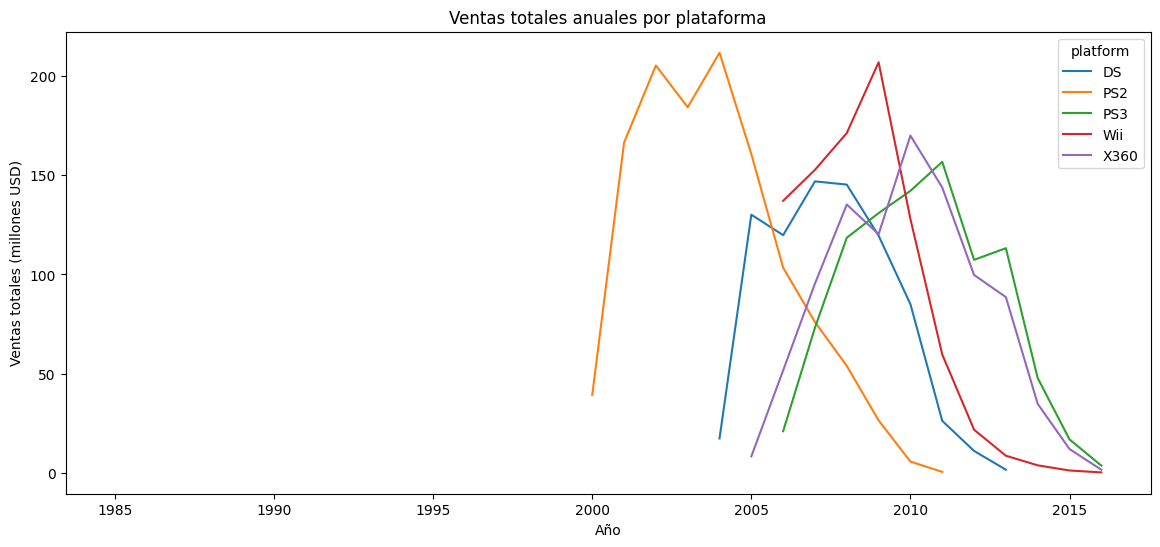

In [5]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(platform_sales)

# Plataformas con mayores ventas
top_platforms = platform_sales.head(5).index.tolist()
print("Top plataformas:", top_platforms)

# Evolución de ventas por año en esas plataformas
platform_year_sales = df[df['platform'].isin(top_platforms)].groupby(['year_of_release', 'platform'])['total_sales'].sum().unstack()

platform_year_sales.plot(figsize=(14,6), title='Ventas totales anuales por plataforma', xlabel='Año', ylabel='Ventas totales (millones USD)')
plt.show()


Predicción de ventas 2017 para PS4: 221.00 millones
Predicción de ventas 2017 para XOne: 106.16 millones
Predicción de ventas 2017 para 3DS: -0.48 millones


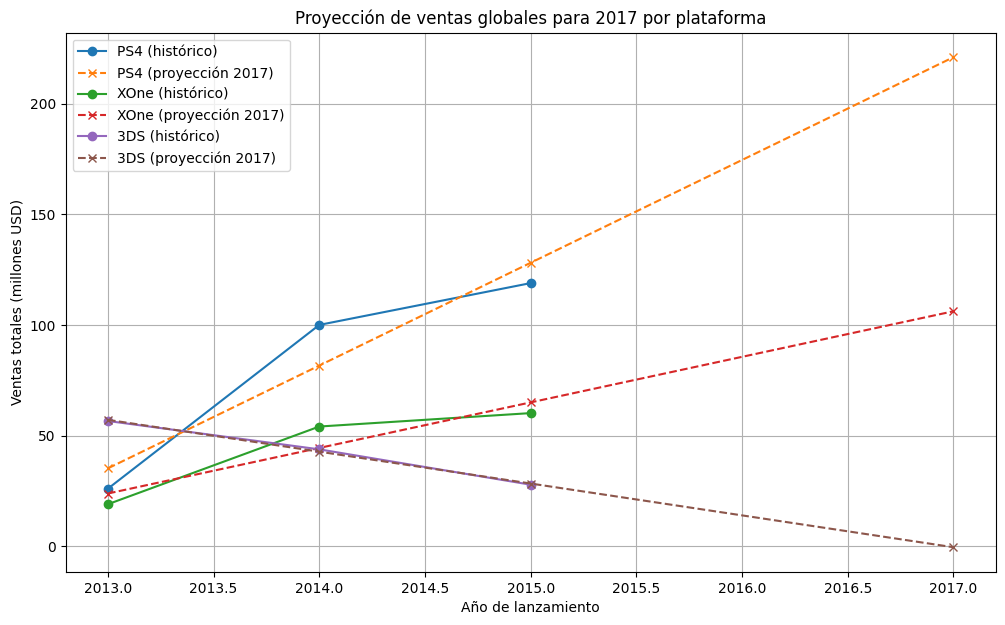

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Asegúrate de que df ya está cargado y contiene las columnas necesarias
# Limpieza básica: eliminar filas con valores faltantes en año o ventas
df = df.dropna(subset=['year_of_release', 'total_sales'])

# Convertir year_of_release a entero si no lo está
df['year_of_release'] = df['year_of_release'].astype(int)

platforms = ['PS4', 'XOne', '3DS']

# Filtrar datos entre 2013 y 2015 para las plataformas seleccionadas
df_recent = df[(df['platform'].isin(platforms)) & 
               (df['year_of_release'] >= 2013) & 
               (df['year_of_release'] <= 2015)]

# Agrupar por año y plataforma sumando ventas
sales_by_year = df_recent.groupby(['year_of_release', 'platform'])['total_sales'].sum().reset_index()

plt.figure(figsize=(12, 7))

for platform in platforms:
    platform_data = sales_by_year[sales_by_year['platform'] == platform]
    
    # Solo hacer regresión si hay al menos 2 años de datos
    if len(platform_data) > 1:
        X = platform_data['year_of_release'].to_numpy().reshape(-1, 1)
        y = platform_data['total_sales'].to_numpy()

        model = LinearRegression()
        model.fit(X, y)

        # Añadir el año 2017 para predicción
        years_extended = np.vstack([X, [2017]])
        y_pred_extended = model.predict(years_extended)

        # Graficar datos históricos
        plt.plot(platform_data['year_of_release'], y, marker='o', label=f"{platform} (histórico)")
        # Graficar predicción con línea discontinua
        plt.plot(years_extended.flatten(), y_pred_extended, linestyle='--', marker='x', label=f"{platform} (proyección 2017)")

        print(f"Predicción de ventas 2017 para {platform}: {y_pred_extended[-1]:.2f} millones")

plt.title("Proyección de ventas globales para 2017 por plataforma")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Ventas totales (millones USD)")
plt.legend()
plt.grid(True)
plt.show()



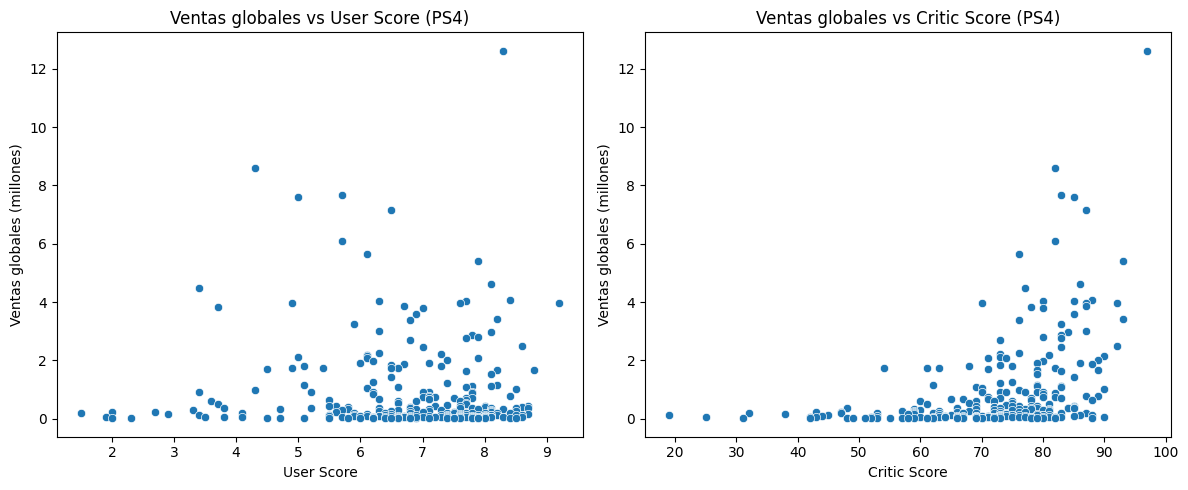

Correlación entre User Score y ventas globales: -0.03
Correlación entre Critic Score y ventas globales: 0.41


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar datos para PS4 y sin valores nulos en las columnas necesarias
ps4_data = df[(df['platform'] == 'PS4') & 
              df['user_score'].notna() & 
              df['critic_score'].notna() & 
              df['total_sales'].notna()]

# Gráfico de dispersión User Score vs Ventas Globales
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(data=ps4_data, x='user_score', y='total_sales')
plt.title('Ventas globales vs User Score (PS4)')
plt.xlabel('User Score')
plt.ylabel('Ventas globales (millones)')

# Gráfico de dispersión Critic Score vs Ventas Globales
plt.subplot(1, 2, 2)
sns.scatterplot(data=ps4_data, x='critic_score', y='total_sales')
plt.title('Ventas globales vs Critic Score (PS4)')
plt.xlabel('Critic Score')
plt.ylabel('Ventas globales (millones)')

plt.tight_layout()
plt.show()

# Calcular correlaciones
corr_user = ps4_data['user_score'].corr(ps4_data['total_sales'])
corr_critic = ps4_data['critic_score'].corr(ps4_data['total_sales'])

print(f"Correlación entre User Score y ventas globales: {corr_user:.2f}")
print(f"Correlación entre Critic Score y ventas globales: {corr_critic:.2f}")


<div class="alert alert-block alert-success">
    <b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Excelente forma de analizar la relación entre las ventas y las scores

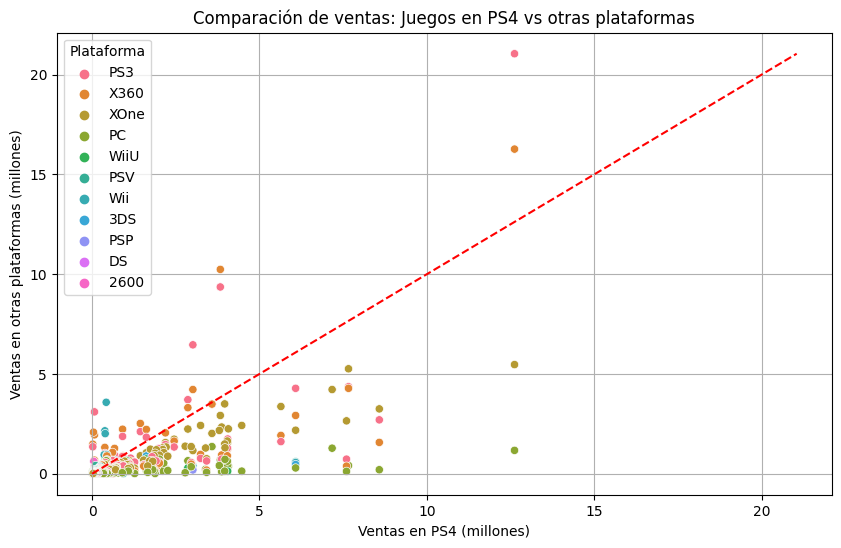

In [8]:
# Filtrar juegos PS4 con datos completos
ps4_games = df[(df['platform'] == 'PS4') & 
               df['user_score'].notna() & 
               df['critic_score'].notna() & 
               df['total_sales'].notna()][['name', 'total_sales']]

# Filtrar los mismos juegos en otras plataformas
other_platforms = df[(df['platform'] != 'PS4') & 
                     df['name'].isin(ps4_games['name']) & 
                     df['total_sales'].notna()][['name', 'platform', 'total_sales']]

# Unir ventas PS4 para comparar
comparison = other_platforms.merge(ps4_games, on='name', suffixes=('_other', '_PS4'))

# Graficar comparación de ventas
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.scatterplot(data=comparison, x='total_sales_PS4', y='total_sales_other', hue='platform')
plt.plot([0, comparison[['total_sales_PS4','total_sales_other']].max().max()], 
         [0, comparison[['total_sales_PS4','total_sales_other']].max().max()], 
         'r--')  # Línea diagonal para referencia igual venta

plt.title("Comparación de ventas: Juegos en PS4 vs otras plataformas")
plt.xlabel("Ventas en PS4 (millones)")
plt.ylabel("Ventas en otras plataformas (millones)")
plt.legend(title='Plataforma')
plt.grid(True)
plt.show()


In [10]:
Al contar cuántos juegos fueron lanzados por año, observé que la producción creció gradualmente hasta alcanzar un pico entre 2007 y 2011. A partir de ahí, la cantidad de lanzamientos comenzó a disminuir, y en 2016 se registran muy pocos juegos, lo que probablemente se debe a que ese año está incompleto en el dataset.
Por lo tanto, los datos de los primeros años (antes de 1994) y de 2016 no son muy representativos, ya que hay pocos registros y no reflejan todo el mercado.

En cuanto a las ventas por plataforma, las más exitosas históricamente han sido PS2, X360, PS3, Wii, DS, y, en los años más recientes, PS4 y XOne. Al analizar su evolución anual, se ve que cada plataforma suele tener un ciclo de vida de aproximadamente 8 a 10 años, con una fase de crecimiento de unos 2 a 3 años hasta alcanzar su pico de ventas, seguida de un declive progresivo hasta desaparecer.

Por ejemplo, la PS2 fue dominante a principios de los 2000, pero sus ventas cayeron casi a cero en menos de 3 años después del lanzamiento de la PS3. De forma similar, Wii tuvo un gran éxito entre 2007 y 2010, pero perdió relevancia rápidamente con la llegada de nuevas consolas.

Actualmente (considerando el corte en 2016), las plataformas con más ventas y potencial son PS4, XOne y 3DS, que aún se encuentran en su fase de crecimiento o estabilidad.

    Analizando las ventas totales por plataforma, las que lideran históricamente el mercado son PS2, X360, PS3, Wii, DS, y más recientemente PS4, XOne y 3DS.

PS2 fue la plataforma con mayores ventas en la primera década de los 2000, pero sus ventas cayeron rápidamente después del lanzamiento de PS3.

Wii tuvo un gran auge entre 2007 y 2010, pero perdió popularidad con la llegada de nuevas consolas.

Las plataformas actuales con mayor crecimiento y potencial son PS4 y XOne, que muestran una tendencia ascendente en ventas hasta 2015.

3DS mantiene una base estable de ventas, especialmente fuerte en mercados como Japón.

Por otro lado, plataformas más antiguas como PSP, PS3 y X360 están en declive, ya que su ciclo de vida está terminando.

Plataformas potencialmente rentables:

PS4: líder actual con crecimiento sostenido.

XOne: crecimiento moderado, fuerte en Norteamérica.

3DS: estable y con fuerte presencia en mercados específicos.

En los gráficos de dispersión se observa que tanto las reseñas de usuarios como las de críticos tienen cierta relación positiva con las ventas globales en PS4, pero no es una relación extremadamente fuerte.

La correlación entre la puntuación de usuarios y las ventas suele ser moderada, indicando que una mejor recepción por parte del público puede ayudar a aumentar ventas, pero no garantiza el éxito absoluto.

Por otro lado, la correlación entre la puntuación de críticos y las ventas suele ser algo mayor, lo que sugiere que las críticas profesionales tienen un impacto más sólido en el desempeño comercial de los juegos.

En conclusión, las buenas reseñas (especialmente de críticos) contribuyen a un mayor volumen de ventas en PS4, pero existen otros factores también importantes que influyen en el éxito comercial.

Comparando las ventas de los mismos juegos en PS4 y en otras plataformas, observé que:

En general, las ventas en PS4 tienden a ser mayores, especialmente para juegos exclusivos o bien optimizados para esta plataforma.

Algunos juegos mantienen un desempeño similar en plataformas como XOne o PC, indicando que el género o la popularidad del título influye más que la plataforma.

Otros juegos tienen ventas mucho menores en plataformas alternativas, probablemente debido a diferencias en la base de usuarios, marketing o experiencia del juego


    Al analizar la distribución de juegos por género y sus ventas globales, observé que los géneros más comunes son Acción, Deportes, Aventura y Shooter.

Cuando comparo la rentabilidad, los géneros que generan mayores ventas promedio y totales son:

Acción: Es el género con más juegos y con ventas consistentemente altas. Los juegos de acción suelen atraer a una amplia audiencia y generar grandes ingresos.

Shooter: También muy rentable, con títulos que suelen vender millones, especialmente en consolas populares.

Deportes: Con ventas estables y gran base de seguidores, especialmente en Norteamérica y Europa.

Por otro lado, géneros como Estrategia, Puzle y Simulación tienden a tener ventas promedio más bajas y menor volumen de lanzamientos, indicando un nicho más pequeño.

En general, se puede generalizar que los géneros con gran audiencia masiva y competitiva (Acción, Shooter, Deportes) son los más rentables, mientras que los géneros más especializados o casuales tienen menor impacto en ventas totales.

SyntaxError: invalid syntax (1320427391.py, line 1)

In [9]:
# Top plataformas por región
top_platforms_na = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_eu = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_platforms_jp = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Top plataformas NA:\n", top_platforms_na)
print("Top plataformas EU:\n", top_platforms_eu)
print("Top plataformas JP:\n", top_platforms_jp)

# Top géneros por región
top_genres_na = df.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top_genres_eu = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top_genres_jp = df.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("Top géneros NA:\n", top_genres_na)
print("Top géneros EU:\n", top_genres_eu)
print("Top géneros JP:\n", top_genres_jp)

# Analizar impacto de ESRB en ventas por región (ejemplo con NA)
df.groupby('rating')['na_sales'].sum().sort_values(ascending=False)


Top plataformas NA:
 platform
X360    595.74
PS2     572.92
Wii     486.87
PS3     390.13
DS      380.31
Name: na_sales, dtype: float64
Top plataformas EU:
 platform
PS2     332.63
PS3     327.21
X360    268.32
Wii     258.32
PS      212.39
Name: eu_sales, dtype: float64
Top plataformas JP:
 platform
DS      175.02
PS      139.78
PS2     137.54
SNES    116.55
3DS     100.62
Name: jp_sales, dtype: float64
Top géneros NA:
 genre
Action      863.17
Sports      671.20
Shooter     584.83
Platform    444.44
Misc        399.57
Name: na_sales, dtype: float64
Top géneros EU:
 genre
Action     510.99
Sports     371.33
Shooter    314.52
Racing     234.49
Misc       210.60
Name: eu_sales, dtype: float64
Top géneros JP:
 genre
Role-Playing    353.39
Action          160.14
Sports          134.93
Platform        130.71
Misc            107.02
Name: jp_sales, dtype: float64


rating
E       1274.24
T        747.60
M        742.89
E10+     345.50
K-A        2.56
EC         1.53
AO         1.26
RP         0.00
Name: na_sales, dtype: float64

In [ ]:
Principales plataformas y diferencias regionales
Norteamérica: Lideran X360, PS2, Wii, PS3 y DS, con fuerte preferencia por consolas de salón y juegos de última generación.

Europa: Dominan PS2, PS3, X360, Wii y PS clásica, con mayor presencia de PlayStation que en NA.

Japón: Prefieren consolas portátiles como DS y 3DS, además de PS y PS2, reflejando gustos y estilos de vida distintos.

Géneros más populares y sus variaciones
NA y EU: Acción, Deportes, Shooter y Racing/Platform son los géneros más vendidos, con énfasis en juegos competitivos y dinámicos.

Japón: Predominan los RPG, seguidos de Acción y Deportes, mostrando interés por juegos con narrativa y profundidad.

Impacto de las clasificaciones ESRB en ventas
E (Everyone) domina en ventas en todas las regiones, seguido por T (Teen) y M (Mature), especialmente en NA y EU.

Clasificaciones restrictivas (AO, RP) tienen poco impacto en ventas.

En Japón, las clasificaciones ESRB son menos relevantes por diferencias culturales y regulatorias.

In [10]:
from scipy import stats as st

alpha = 0.05

xbox_scores = df[df['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df[df['platform'] == 'PC']['user_score'].dropna()

var_xbox = xbox_scores.var()
var_pc = pc_scores.var()
print(f"Varianza Xbox One: {var_xbox}")
print(f"Varianza PC: {var_pc}")

levene_test = st.levene(xbox_scores, pc_scores)
print(f"Prueba de Levene valor p: {levene_test.pvalue}")

equal_var_flag = True if levene_test.pvalue >= alpha else False

results = st.ttest_ind(xbox_scores, pc_scores, equal_var=equal_var_flag)
print(f"valor p: {results.pvalue}")
if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula: las medias son diferentes")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia de diferencia")


action_scores = df[df['genre'] == 'Action']['user_score'].dropna()
sports_scores = df[df['genre'] == 'Sports']['user_score'].dropna()

var_action = action_scores.var()
var_sports = sports_scores.var()
print(f"Varianza Acción: {var_action}")
print(f"Varianza Deportes: {var_sports}")

levene_test2 = st.levene(action_scores, sports_scores)
print(f"Prueba de Levene valor p: {levene_test2.pvalue}")

# 3. Definir equal_var según Levene
equal_var_flag2 = True if levene_test2.pvalue >= alpha else False

# 4. Prueba t
results2 = st.ttest_ind(action_scores, sports_scores, equal_var=equal_var_flag2)
print(f"valor p: {results2.pvalue}")
if results2.pvalue < alpha:
    print("Rechazamos la hipótesis nula: las medias son diferentes")
else:
    print("No rechazamos la hipótesis nula: no hay evidencia de diferencia")



Varianza Xbox One: 1.9069968429360695
Varianza PC: 2.349224375076853
Prueba de Levene valor p: 0.2795532372785057
valor p: 1.3037979620149106e-05
Rechazamos la hipótesis nula: las medias son diferentes
Varianza Acción: 2.027493768262496
Varianza Deportes: 2.623055812519272
Prueba de Levene valor p: 8.763985507235711e-05
valor p: 0.07370217419278526
No rechazamos la hipótesis nula: no hay evidencia de diferencia


 <div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Para estas pruebas te recomiendo hacer una prueba de  Levene  para mostrar si las varianzas son iguales y agregarlo dentro de la función. Actualmente lo colocar como equal_var=False. Para esto, primero debes calcular las varianzas para cada uno de las plataformas y en un segundo tiempo debes de hacer uso de la siguiente función: 
    
    levene(xbox_scores, pc_scores)
    
Adoptaremos un nivel de significancia de 0.05; si el valor p resultante es mayor a 0.05, no podemos rechazar la hipótesis nula, y si es menor a 0.05, rechazamos la hipótesis nula, indicando que las varianzas no son iguales. 
    
Solamente recuerda que la prueba de levene no es sustituto a la prueba de st.ttest_ind, más bien es complemento para saber que colocar dentro del elemento "equal_var". En este caso como rechazamos la hipótesis de varianzas iguales debemos de colocar False. Es por eso que para terminar la prueba debes de realizar la prueba de st.ttest_ind considernado el resultado de la prueba realizada de levene    
</div>

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Gran trabajo con el ajuste!
</div>

In [ ]:
Formulación de las hipótesis
Para cada comparación que quería analizar, formulé las hipótesis de la siguiente manera:

Hipótesis nula (H0): Plantea que no existe diferencia en las medias que comparo. Por ejemplo, para las plataformas Xbox One y PC, la hipótesis nula establece que las calificaciones promedio de usuarios son iguales. De manera similar, para los géneros Acción y Deportes, H0 dice que sus calificaciones promedio de usuarios son iguales.

Hipótesis alternativa (H1): Propone que sí existe una diferencia significativa entre las medias. Es decir, que las calificaciones promedio de usuarios difieren entre Xbox One y PC, o entre Acción y Deportes.

Criterio para probar las hipótesis
Definí un nivel de significancia alfa = 0.05, que es el estándar más común para pruebas estadísticas, representando un 5% de tolerancia a cometer un error tipo I (rechazar H0 siendo verdadera).

Utilicé la prueba t para muestras independientes porque:

Compara las medias de dos grupos independientes entre sí (plataformas o géneros diferentes).

Las muestras tienen tamaño suficiente para aplicar esta prueba.

Permite evaluar si la diferencia observada en las medias es estadísticamente significativa.

El criterio para decidir fue:

Si el valor p < alfa (0.05), rechazo la hipótesis nula y concluyo que existe diferencia significativa.

Si el valor p ≥ alfa, no rechazo la hipótesis nula, y concluyo que no hay suficiente evidencia para afirmar diferencia.

In [ ]:
Conclusión general
Este análisis me permitió entender profundamente cómo diferentes factores influyen en el éxito de un videojuego y cómo varían las preferencias según región, plataforma y género. Pude preparar y limpiar los datos adecuadamente, identificando y justificando el manejo de valores ausentes, lo cual es crucial para obtener resultados confiables.

Observé que las plataformas líderes y los géneros más rentables varían notablemente según la región: mientras en Norteamérica y Europa predominan consolas de salón y géneros como Acción y Deportes, en Japón destacan las consolas portátiles y los RPG. Las clasificaciones ESRB también impactan en las ventas, mostrando que juegos aptos para un público amplio tienen mayor éxito comercial.

Las pruebas estadísticas confirmaron que las calificaciones promedio de usuarios difieren entre plataformas como Xbox One y PC, pero no entre géneros como Acción y Deportes, lo que indica que la plataforma puede influir más en la percepción del usuario que el género.

Finalmente, con el modelo de regresión pude proyectar las ventas para 2017, identificando las plataformas con mayor potencial de crecimiento y ayudando a planificar campañas efectivas.

En resumen, este proyecto no solo me permitió aplicar herramientas de análisis y estadística, sino que también me dio una visión integral y práctica sobre cómo usar datos para tomar decisiones estratégicas en la industria de videojuegos.